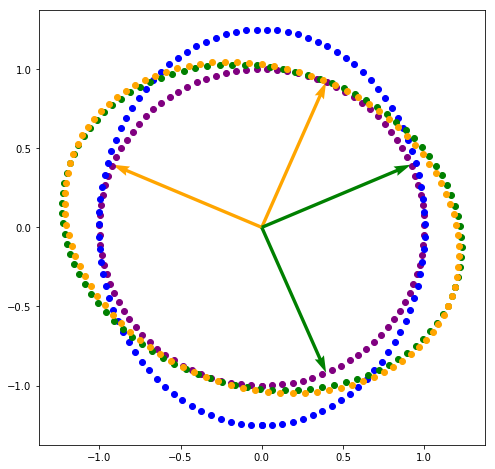

In [141]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import math

from matrixoperations import *


#setup   
s = Helper.generateRandomBetween(-10,10)
perpframes = PerpFrames(s)
s = Helper.generateRandomBetween(-1.5,1.5)
perpframes2 = PerpFrames(s)

#get stretcher matrix
stretcher = Stretcher()
stretcher.setXYStretch(Helper.generateRandomBetween(2.2, 2.7), Helper.generateRandomBetween(.6, 1.6))
stretchMat = stretcher.getStretchMatrix()

#generate points
x = np.linspace( -math.pi, math.pi, 100)
 
circle = []
for val in x:
    point = ShapeGenerator.generateCircle(val)
    circle.append(point)
circle = np.array(pointmatrix).transpose()

#draw a circle
plt.figure(figsize=(8,8))
plt.plot(circle[:,0], circle[:,1], 'ro', color = 'purple')

# #stretch the circle
stretched = stretchMat.dot(pointmatrix)
plt.plot(stretched[0,], stretched[1,], 'ro', color = 'blue')

#hang it
hung = perpframes2.hanger.dot(stretched)
plt.plot(hung[0,], hung[1,], 'ro', color = 'green')

#align it
aligned = perpframes.hanger.dot(stretched)
plt.plot(aligned[0,], aligned[1,], 'ro', color = 'orange')


#rescale graph to make sure x and y are the same height and width
ax = plt.gca()

lim = 0
if(max(plt.ylim() > max(plt.xlim()))):
	lim = max(plt.ylim())

#draw perp frames
def drawVector(ax, dim1, dim2, col = 'blue'):
    soa = np.array([[0, 0, dim1, dim2]])
    X, Y, U, V = zip(*soa)
    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = col) 


#draw vecotrs
#curtosy of https://stackoverflow.com/questions/12265234/how-to-plot-2d-math-vectors-with-matplotlib
drawVector(ax, perpframes.aligner[0,0], perpframes.aligner[0,1], 'orange')
drawVector(ax, perpframes.aligner[1,0], perpframes.aligner[1,1], 'orange')
drawVector(ax, perpframes.hanger[0,0], perpframes.hanger[0,1], 'green')
drawVector(ax, perpframes.hanger[1,0], perpframes.hanger[1,1], 'green')


plt.draw()
ax.set_ylim(-1 * lim, lim)
ax.set_xlim(-1 * lim, lim)
#show the graph
plt.show()

In [119]:
print(stretcher.xstretch * perpframes2.hanger[1])
print("---------------------------")
circle.dot(perpframes.aligner[1])

[ 0.99193668  0.42331262]
---------------------------


array([-0.97731617, -0.96191625, -0.94264303, -0.91957413, -0.89280242,
       -0.86243571, -0.82859627, -0.79142038, -0.75105771, -0.70767079,
       -0.66143434, -0.61253453, -0.56116825, -0.50754235, -0.45187275,
       -0.39438362, -0.33530645, -0.27487911, -0.21334494, -0.1509517 ,
       -0.08795063, -0.02459542,  0.03885883,  0.10215661,  0.16504305,
        0.22726491,  0.28857166,  0.34871643,  0.40745704,  0.46455696,
        0.51978628,  0.57292261,  0.62375197,  0.67206971,  0.71768126,
        0.76040296,  0.80006279,  0.83650105,  0.86957101,  0.89913951,
        0.9250875 ,  0.94731049,  0.96571899,  0.98023889,  0.9908117 ,
        0.99739487,  0.99996188,  0.9985024 ,  0.9930223 ,  0.98354365,
        0.97010462,  0.95275932,  0.93157759,  0.90664473,  0.87806113,
        0.84594189,  0.81041634,  0.77162752,  0.72973164,  0.68489738,
        0.63730529,  0.58714699,  0.53462446,  0.47994918,  0.42334132,
        0.36502881,  0.30524646,  0.24423499,  0.18224007,  0.11